# Logistic Regression

* Used to predict a catagorical label.
* It is a classification algorithm.
* Any continuous data can be converted into categories through discretization.
* Classification algorithms also produce probability of prediction belonging
  to a class.
* Error metrics such as RMSE do not apply to logistic regression.

## Working of Logistic Regression

* It works by transforming a linear regression into a classification model
  using the function:
  ```ø (x) = 1 / (1 + e**(-x)) <- sigmoid function```
* After that, our y-axis has limits 0 -> 1, and, thus, can be thought of as
  probability of the occurrence of x. We set a cut-off point (usually 0.5),
  above which all values will be scaled to 1, and all values below it will be
  scaled to 0.

* Then it is converted into log-odds, whose y-axis ranges from -infinity to
  +infinity with y-hat = 0.5 denoting 0 on log-odds.

## Finding the Best Fit

* Uses 'maximum likelihood' to find the best fitting model.
* To go from log-odds to probability graph, use ```p = odds / (1 + odds)```.
* To go from probability to log-odds, use ```odds = ln (p / (1 - p))```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy as sp
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, \
    classification_report, plot_confusion_matrix, plot_roc_curve
from joblib import load, dump

In [2]:
df = pd.read_csv('~/Documents/Data Science Masterclass/DATA/hearing_test.csv')

In [3]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [4]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='age', ylabel='physical_score'>

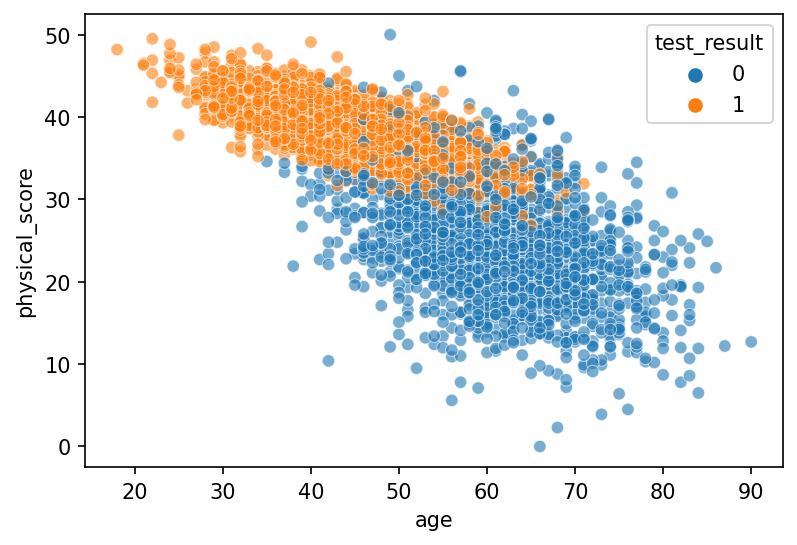

In [5]:
plt.figure(dpi=150)
sbn.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=0.6)

In [6]:
X = df.drop('test_result', axis=1)

In [7]:
y = df['test_result']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.1, random_state=101)

In [9]:
scaler = StandardScaler()

In [10]:
scaled_x_train = scaler.fit_transform(X_train)

In [11]:
scaled_x_test = scaler.transform(X_test)

In [12]:
model = LogisticRegression()

In [13]:
model.fit(scaled_x_train, y_train)

LogisticRegression()

In [14]:
model.coef_

array([[-0.94953524,  3.45991194]])

In [15]:
y_hat = model.predict(scaled_x_test)

# Error Metrics in Classification

## Recall

* Recall = True Positives / Total Actual Positives

## Precision

* Precision = True Positives / Total Predicted Positives
  
## Harmonic Mean

* F = (2 x Precision x Recall) / (Precision + recall)

If accuracy is almost equal to recall and precision values, then the model is
good.


In [16]:
accuracy_score(y_test, y_hat)

0.93

In [17]:
confusion_matrix(y_test, y_hat)

array([[172,  21],
       [ 14, 293]])

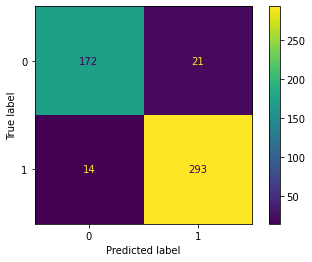

In [18]:
plot_confusion_matrix(model, scaled_x_test, y_test)

In [19]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



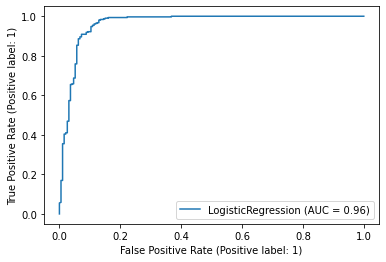

In [20]:
plot_roc_curve(model, scaled_x_test, y_test)

In [21]:
model.predict_proba(scaled_x_test)[0]
# [Probability of belonging to 0 class, Probability of belonging to 1 class]

array([0.02384343, 0.97615657])

# Multi-class Regression


In [22]:
df = pd.read_csv('~/Documents/Data Science Masterclass/DATA/iris.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

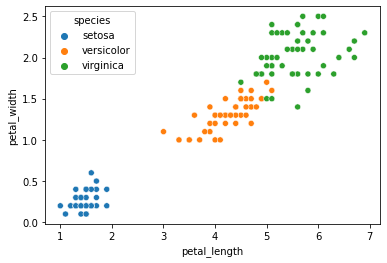

In [25]:
sbn.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

In [26]:
X = df.drop('species', axis=1)

In [27]:
y = df['species']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
    random_state=101)

In [29]:
scaler = StandardScaler()

In [30]:
scaled_X_train = scaler.fit_transform(X_train)

In [31]:
scaled_X_test = scaler.transform(X_test)

In [43]:
model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=1000)
# *Saga solver supports Elastic Net.
# OVR -> One vs. Rest

In [44]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 5)
C = np.logspace(0, 10, 5)

param_grid = {
    'penalty': penalty,
    'l1_ratio': l1_ratio,
    'C': C,
}

In [45]:
grid_model = GridSearchCV(model, param_grid=param_grid)

In [46]:
grid_model.fit(scaled_X_train, y_train)

/usr/local/anaconda3/envs/MachineLearning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/usr/local/anaconda3/envs/MachineLearning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/usr/local/anaconda3/envs/MachineLearning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/usr/local/anaconda3/envs/MachineLearning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (pen

GridSearchCV(estimator=LogisticRegression(max_iter=1000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10]),
                         'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [47]:
grid_model.best_params_

{'C': 316.22776601683796, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [48]:
y_hat = grid_model.predict(scaled_X_test)

In [49]:
accuracy_score(y_test, y_hat)

0.9736842105263158

In [50]:
confusion_matrix(y_test, y_hat)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])